In [1]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
import math
import sklearn   
import sklearn.datasets as datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler    # Sklearn's preprocessing library     
from sklearn import preprocessing
import sklearn.metrics
import sklearn.model_selection
import sklearn.tree as tree                                        # DRZEWO DECYZYJNE
from scipy import stats
from sklearn.model_selection import cross_validate, GridSearchCV       # DO WALIDACJI SKROŚNEJ(KRZYŻOWEJ)
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV   # Importing train and test data split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree    # DRZEWO DECYZYJNE
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score,classification_report
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier # Classifiers
from sklearn.linear_model import LogisticRegression
from mlxtend import plotting

# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

In [3]:
%cd "C:\Users\tk\Desktop\ratunek code\jdszr7-code-breakers\projekt_ML"
df = pd.read_csv("df_rm.csv") 
df # display the data frame
df.head(11)

C:\Users\tk\Desktop\ratunek code\jdszr7-code-breakers\projekt_ML


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.660         0.00             1.8      0.075   
5             7.9             0.600         0.06             1.6      0.069   
6             7.3             0.650         0.00             1.2      0.065   
7             7.8             0.580         0.02             2.0      0.073   
8             7.5             0.500         0.36             6.1      0.071   
9             6.7             0.580         0.08             1.8      0.097   
10            5.6             0.615         0.00             1.6      0.089   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  13.0                  40.0   0.9978  3.51       0.56   
5                  15.0                  59.0   0.9964  3.30       0.46   
6                  15.0                  21.0   0.9946  3.39       0.47   
7                   9.0                  18.0   0.9968  3.36       0.57   
8                  17.0                 102.0   0.9978  3.35       0.80   
9                  15.0                  65.0   0.9959  3.28       0.54   
10                 16.0                  59.0   0.9943  3.58       0.52   

    alcohol  quality  
0       9.4        0  
1       9.8        0  
2       9.8        0  
3       9.8        0  
4       9.4        0  
5       9.4        0  
6      10.0        1  
7       9.5        1  
8      10.5        0  
9       9.2        0  
10      9.9        0

In [3]:
# pokazuje jakie są przypadki w kolumnie + PODAJE TYP
df['quality'].unique()

array([0, 1], dtype=int64)

In [3]:
df.keys()
df.shape

(1232, 12)

In [4]:
from collections import Counter
Counter(df['quality']).most_common()

[(0, 1063), (1, 169)]

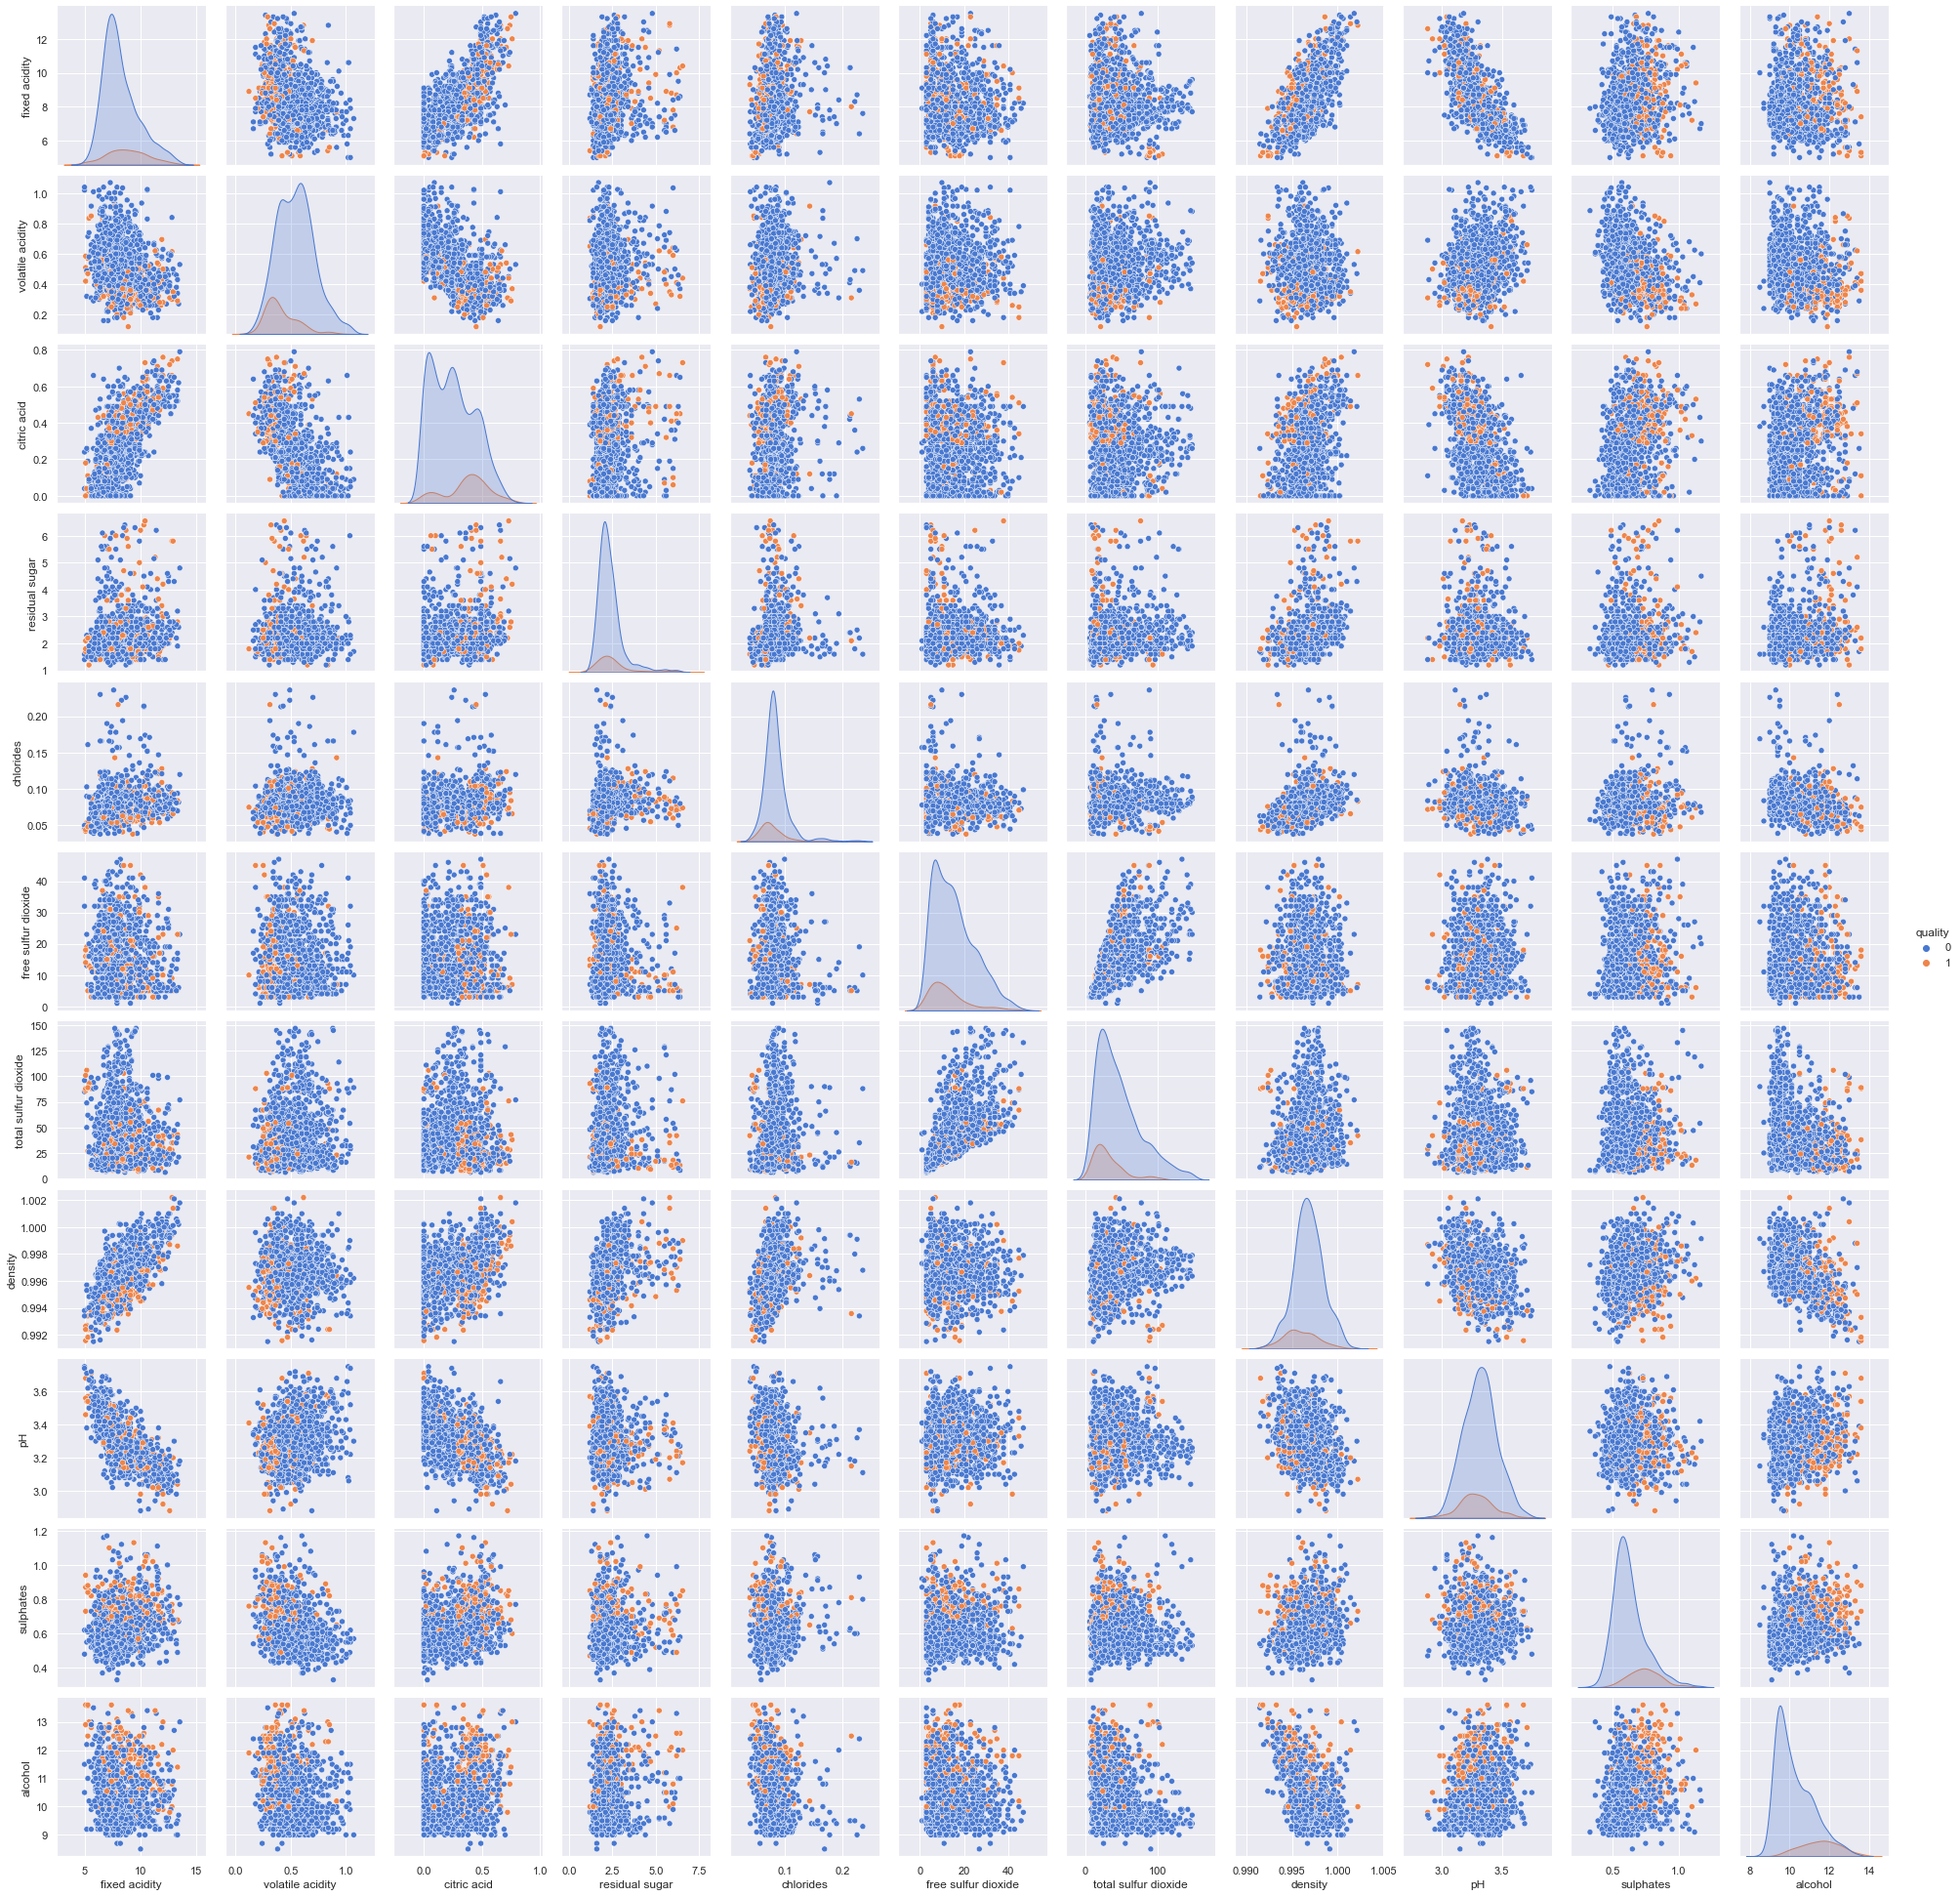

In [6]:
sns.pairplot(df, hue="quality")

(0.6541843843807191, 2.2870051320961484e-151)


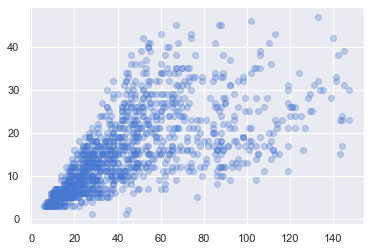

In [7]:
fsd = df['free sulfur dioxide'].to_numpy()  #zależność między tymi dwiema kolumnami ma najbardziej liniowy charakter
tsd = df['total sulfur dioxide'].to_numpy()
print(stats.pearsonr(tsd,fsd))
plt.scatter(tsd,fsd, alpha=0.3)
#plt.scatter(np.sqrt(x),y)

### Podział zbioru

In [8]:
X = df.drop("quality", axis=1)
y = df["quality"]
featureduce = df.drop(['fixed acidity',	'volatile acidity',	'residual sugar','chlorides','free sulfur dioxide',	'total sulfur dioxide',	'density',	'sulphates','quality'], axis=1)
X_f = featureduce
X_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  1232 non-null   float64
 1   pH           1232 non-null   float64
 2   alcohol      1232 non-null   float64
dtypes: float64(3)
memory usage: 29.0 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = df.quality, random_state=123)

In [7]:
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (985, 11)
The shape of X_test is: (247, 11)
The shape of y_train is: (985,)
The shape of y_test is: (247,)


c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(336.9714285714286, 0.5, 'sulphates')

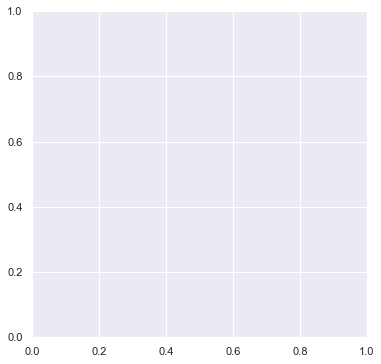

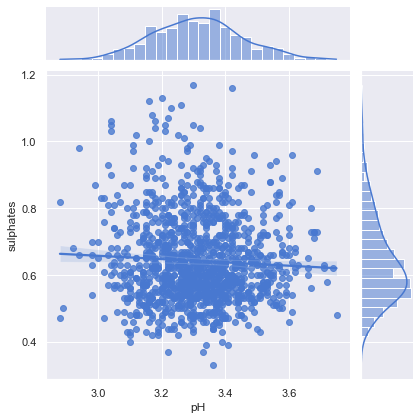

In [11]:
from seaborn import jointplot
fig, ax = plt.subplots(figsize=(6,6))
new_df = X.copy()
new_df['target']=yp = jointplot('pH', 'sulphates', data = new_df, kind= 'reg')
plt.xlabel('pH')
plt.ylabel('sulphates')
# Wykres łączony- wykres z krzywą regresji i histogramach po bokach

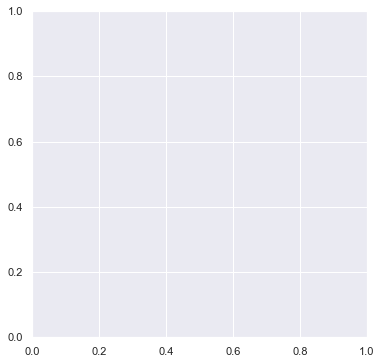

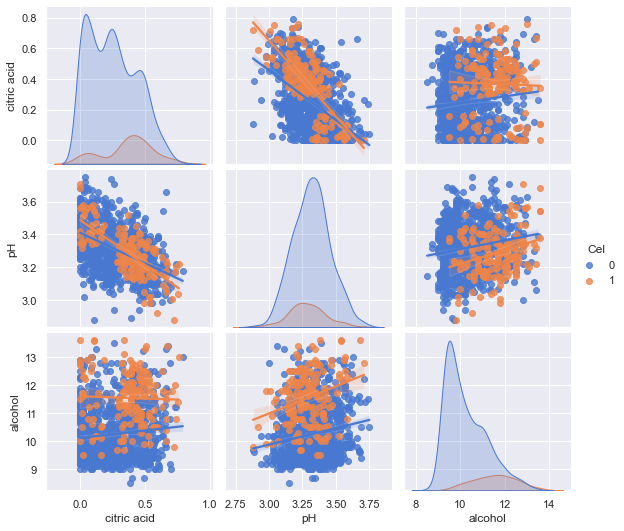

In [13]:
# Macierz wykresów - przedstawia jądrowe gęstości rozkładów wartości w parach kolumn. W argumencie hue należy podać nazwę kolumny zawartej w struk turze DataFrame. 
# Jeżeli będzie to nazwa kolumny wynikowej, wtedy wykresy będą pokazywały, jaki wpływ na wynik mają poszczególne kolumny danych.

from seaborn import pairplot
fig, ax = plt.subplots (figsize=(6, 6))
new_df = X_f.copy()
new_df ["target"] = y 
vars = ['citric acid','pH','alcohol']
p = pairplot(new_df, vars=vars, hue="target", kind="reg")
labels = ['citric acid','pH','alcohol']

for i in range (3): 
    p.axes [2] [i].set_xlabel(labels[i])
    p.axes[i][0].set_ylabel(labels[i])
p._legend.remove() 
p.add_legend (title="Cel")

Text(0.5, 1.0, 'Współrzędne równoległe 11 cech')

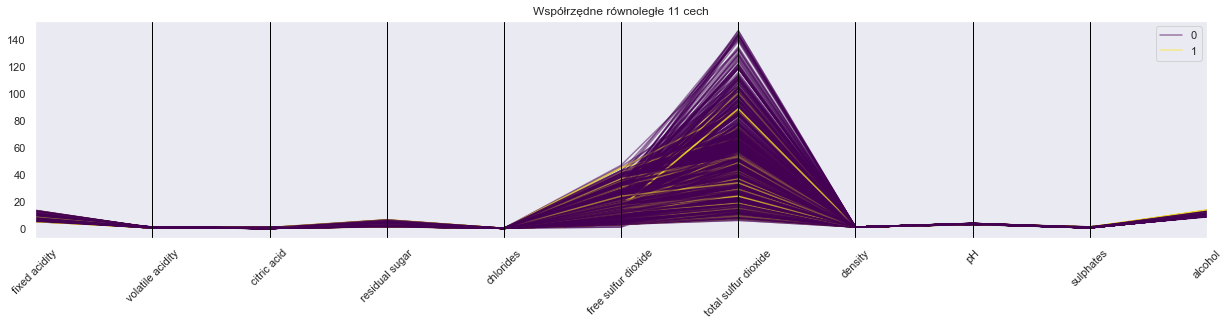

In [9]:
# Wykres współrzędnych równoległych Dla danych wielowymiarowych
from pandas.plotting import ( parallel_coordinates,) 
fig, ax = plt.subplots (figsize=(21, 4))
new_df = X.copy() 
new_df["target"] = y
parallel_coordinates(new_df, "target", ax=ax,colormap="viridis", alpha=0.5,)
ax.set_xticklabels ( ax.get_xticklabels(), rotation=45)

ax.set_title("Współrzędne równoległe 11 cech")

Text(0.5, 1.0, 'Wykres RadViz 8 cech')

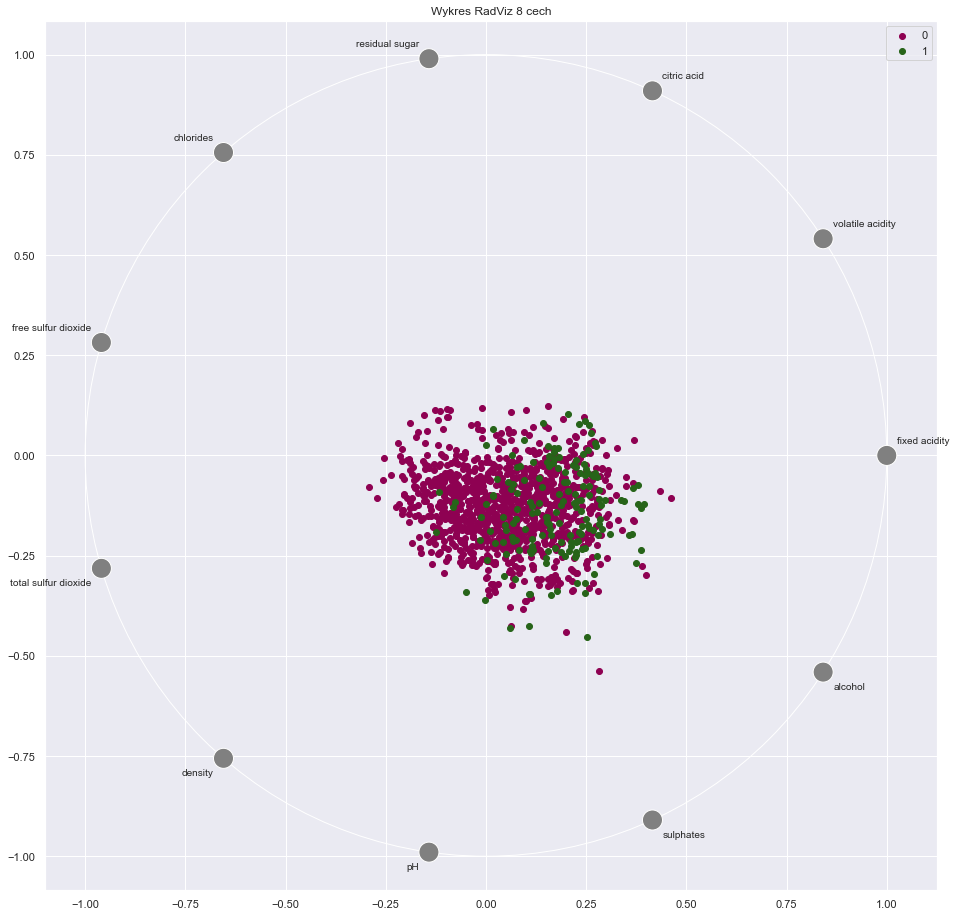

In [13]:
# Wykres ma postać koła w którego wnętrzu znajdują się punkty reprezentujące próbki danych a na obrzeżach cechy. Wartości są znormalizowane. Każdy punkt jest połączony za pomocą sprężyny z cechami do których jest przyciągany. 
# Jest to jeden ze sposobów wizualizowanie odrębności cech
from pandas.plotting import radviz
fig, ax = plt.subplots (figsize=(16, 16))
new_df = X.copy() 
new_df ["target"] = y
radviz(new_df, "target", ax=ax, colormap="PiYG")
ax.set_title("Wykres RadViz 8 cech") 

### Analizy na bazie modelu regresji logistycznej

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
logr = LogisticRegression(C=1, random_state=42) #użycie C skutkuje większą dokładnością zestawu uczącego
logr.fit(X_train,y_train)
for_train=logr.score(X_train, y_train)
for_test=logr.score(X_test, y_test)
for_test,for_train

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8866396761133604, 0.8802030456852792)

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


[Text(0.5, 1.0, 'Ważności 11 cech (regresja logistyczna)'),
 Text(0.5, 0, 'Względna wielkość współczynnika')]

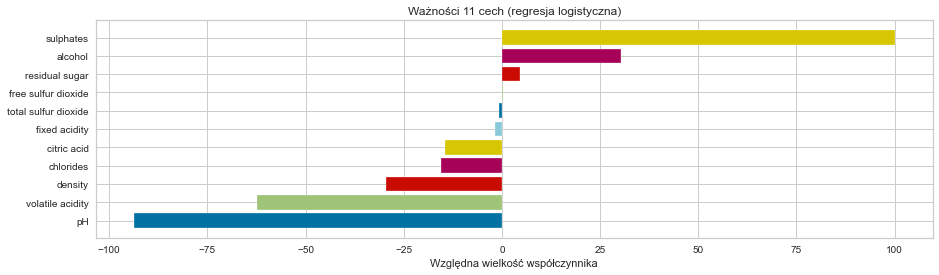

In [15]:
from yellowbrick.features import FeatureImportances 
fig, ax = plt.subplots (figsize=(15, 4)) 
fi_viz= FeatureImportances (logr)

fi_viz.fit(X, y) 
fi_viz.ax.set (title="Ważności 11 cech (regresja logistyczna)", xlabel="Względna wielkość współczynnika")
#użyta poniżej funkcja wizualizująca przypisuje wartości największej liczbę 100(lub -100) a pozostałym wartościom proporcjonalnie mniejsze liczby

Text(0.5, 1.0, 'Informacja wzajemna')

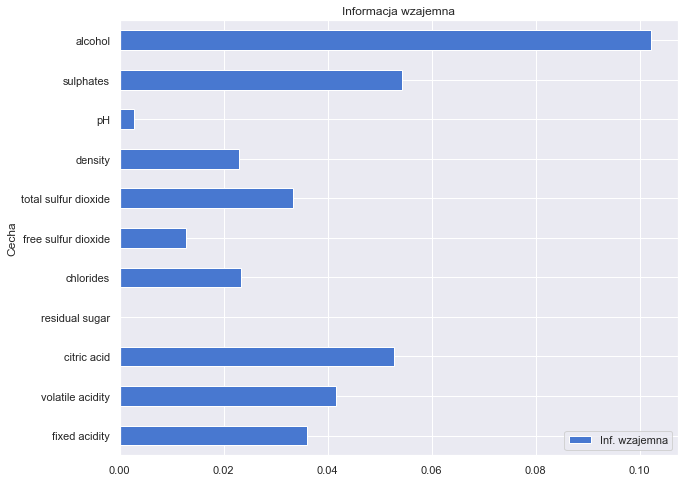

In [9]:
# Określenie wzajemnych informacji o cechach i wartościach docelowych Na podstawie wyników bezparametrowy tego testu wykorzystującego algorytm k najbliższych sąsiadów
# Górna wartość informacji wzajemnej nie jest ograniczona. 
# Informacja zamienna jest miarą zależności pomiedzy zmiennymi. Jest to liczba bitów podobieństwa cechy i celu. Wartość 0 oznacza, że pomiędzy zmiennymi nie ma zależności.
from sklearn import feature_selection 
mic = feature_selection.mutual_info_classif(X, y)
fig, ax = plt.subplots(figsize=(10, 8))
(
    pd.DataFrame(
        {"Cecha": X.columns, "Inf. wzajemna":mic}
    )
    .set_index("Cecha")
    .plot.barh (ax=ax))
ax.set_title("Informacja wzajemna") 

### Analizy na bazie modelu random forest

In [8]:
# pip install yellowbrick
from yellowbrick.features import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

Text(6, 0.7, 'Liczba cech = 7 \nOcena = 0.878')

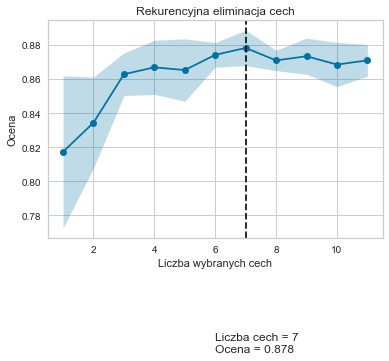

In [11]:
# Rekurencyjna eliminacja cech polega na cyklicznym usuwaniu najmniej istotnych cech i dopasowywaniu modelu. Wykorzystuje się do tego bibliotekę scikit-learn i atrybuty coef_oraz.feature_importances
fig, ax = plt.subplots (figsize=(6, 4))
rfe = RFECV(ensemble.RandomForestClassifier(n_estimators=100), cv=5,)
rfe.fit(X, y)
rfe.ax.set(xlabel="Liczba wybranych cech", ylabel="Ocena", title="Rekurencyjna eliminacja cech")
rfe.ax.text(6, 0.7,"Liczba cech = {} \nOcena = {:0.3f}".format(rfe.rfe_estimator_.n_features_, rfe.cv_scores_.mean (axis=1).max()))

# 1 fixed acidity, 2 volatile acidity, 3 citric acid, 4 residual sugar, 5 chlorides, 6 free sulfur dioxide,	7 total sulfur dioxide,	8 density,	9 pH,	10 sulphates,	11 alcohol	

In [ ]:
rfe.rfe_estimator_.ranking_ 

array([1, 1, 1, 4, 2, 5, 1, 1, 3, 1, 1])

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
rfe.rfe_estimator_.n_features_


7

In [ ]:
rfe.rfe_estimator_.support_

array([ True,  True,  True, False, False, False,  True,  True, False,
        True,  True])

### ### Analizy na bazie modelu Decision tree

In [9]:
dt = DecisionTreeClassifier(
random_state=42, 
max_depth=3,
class_weight=None,
criterion='gini', 
max_features=None, 
max_leaf_nodes=None,
min_impurity_decrease=0.0, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0.0,  
splitter='best')
dt.fit(X_train, y_train) 
    
dt.score (X_test, y_test)

0.8825910931174089

In [13]:
dt.predict(X.iloc[[0]])

array([0], dtype=int64)

In [14]:
dt.predict_proba (X.iloc[[0]]) 


array([[0.96428571, 0.03571429]])

In [15]:
dt.predict_log_proba(X.iloc[[0]])

array([[-0.03636764, -3.33220451]])

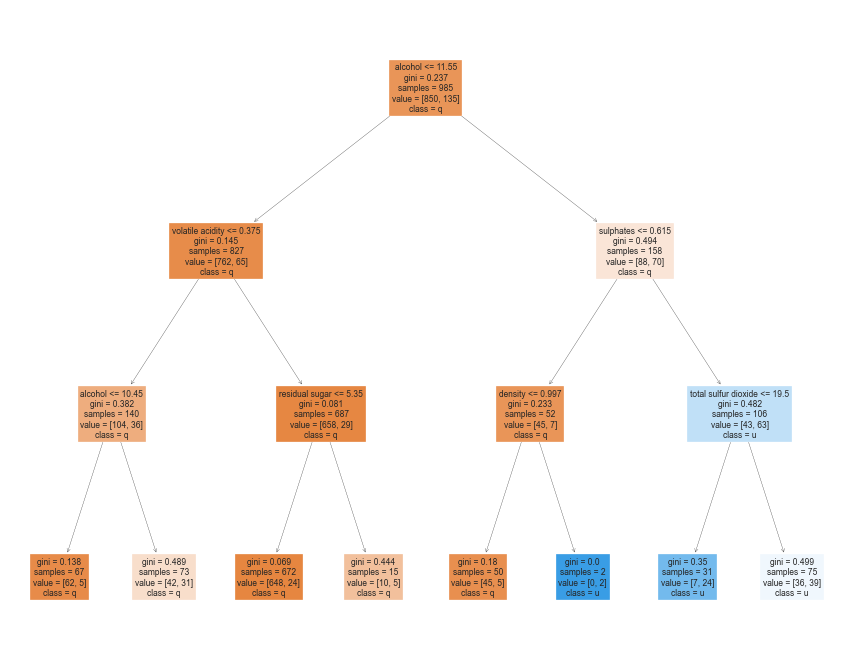

In [16]:
plt.figure(figsize=(15, 12))
_ = tree.plot_tree(dt, filled=True,feature_names=['fixed acidity','volatile acidity',	'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'], class_names='quality')  #,

In [17]:
# Poniżej przedstawiony jest kod wizualizujący ważności cech Giniego (dzięki nim można zmniejszyć błąd modelu):

for col, val in sorted(zip (X.columns, dt.feature_importances_),
key=lambda x: x[1], reverse=True,
)[:5]:
    print(f" {col:10} {val: 10.3f}") 

 alcohol         0.563
 sulphates       0.189
 volatile acidity      0.138
 density         0.040
 total sulfur dioxide      0.036


In [10]:
from yellowbrick.classifier import ConfusionMatrix

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 1.0, 'Ważność 11 cech (drzewo decyzyjne)'),
 Text(0.5, 0, 'Względna ważność')]

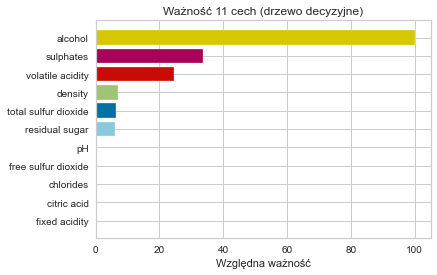

In [11]:
# Wykres ważności cech w odniesieniu do największej bezwzględnej wartości współczynnika regresji. Użyta do tej funkcja wizualizuj sama argument relative= True który powoduje że największej wartość jest przypisywana liczba 
# 100 lub minus 100 a pozostałem wartością proporcjonalnie mniejsze liczby. 
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots (figsize=(6, 4))
fi_viz = FeatureImportances (dt)
fi_viz.fit(X, y)
fi_viz.ax.set(title="Ważność 11 cech (drzewo decyzyjne)", xlabel = "Względna ważność")


In [27]:
pip install graphviz
pip install dtreeviz
!pip3 install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


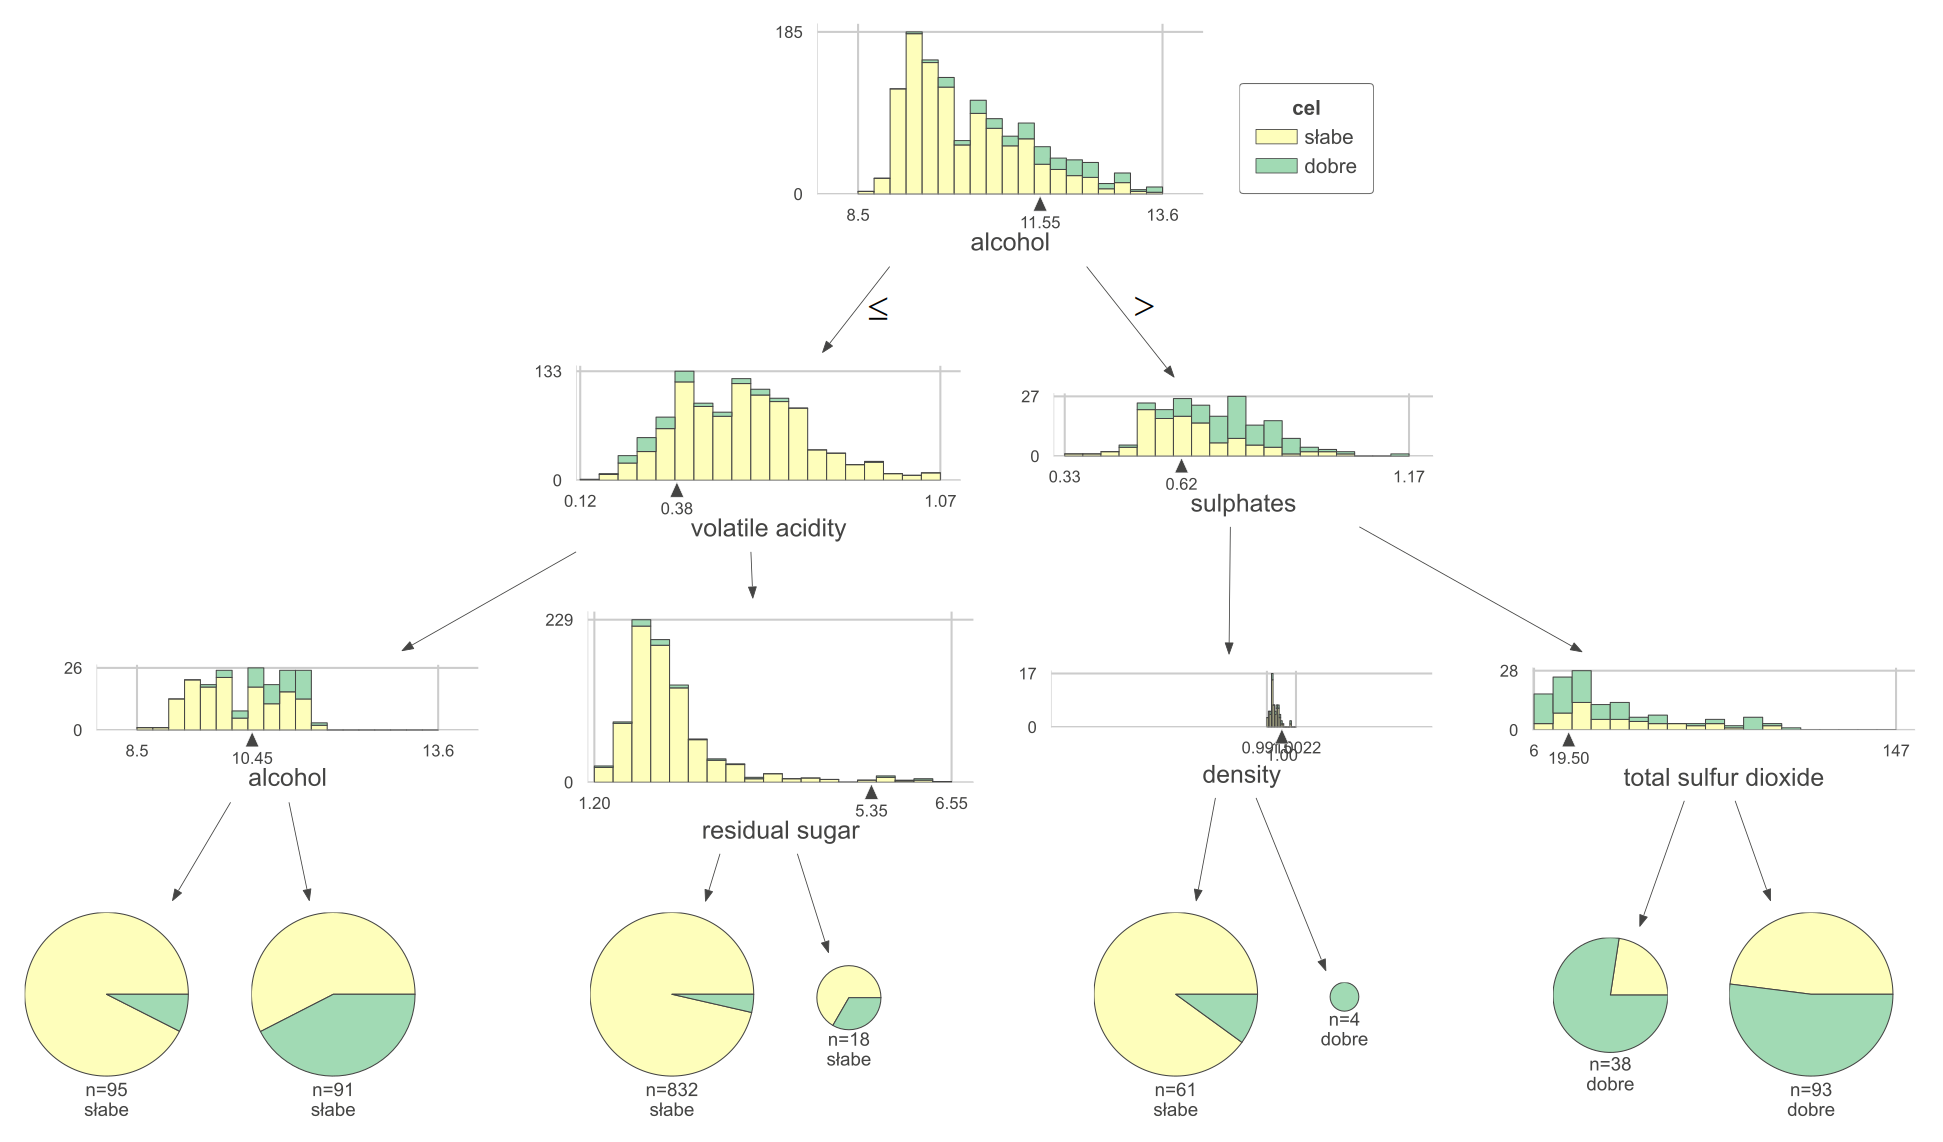

In [13]:
import graphviz.backend as be
from dtreeviz.trees import *
viz = dtreeviz(dt, X,y,target_name="cel",feature_names=X.columns, class_names=["słabe", "dobre"],scale=(2.8))
viz
# viz.save("decision_tree.svg")
#Wykres pokazuje informacje o funkcjonowaniu drzewa. Obraz drzewa z 100 histogramami zawierającymi cenne informacje

In [ ]:
# Jednym ze sposobów określenia właściwej wartości hiperparametru jest wyznaczenie krzywej weryfikacji- jest to wykres skuteczności model w zależności od zmieniających się wartości hiperparametry.
# Do utworzenia wykresu wykorzystuje się zarówno dane treningowe jak  weryfikacyjne/ Na podstawie oceny weryfikacyjny można wnioskować jak model będzie reagował pewnie na nieznane wcześniej dane.
#  wybiera się taką wartości parametrów przy której ocena weryfikacyjna jest największa. 
# Sprawdzamy czy warto hiperparametru max_depth wpływa na wydajność modelu drzewa losowego. Używamy parametr scoring,oznaczającego wskaźnik modelu ( domyślna wartość dla klasyfikacji to accuracy)
#Aby wykorzystać kilka procesorów i przyspieszyć obliczenia, należy użyć pa rametru n_jobs. Wartość -1 oznacza wykorzystanie wszystkich procesorów.

[Text(0.5, 1.0, 'Krzywa weryfikacji klasyfikatora drzewa losowego'),
 Text(0.5, 0, 'max_depth'),
 Text(0, 0.5, 'Ocena')]

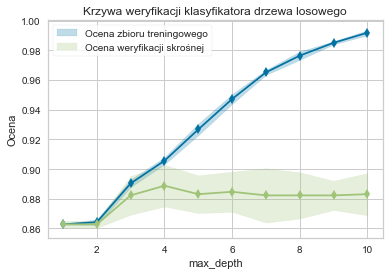

In [27]:
from yellowbrick.model_selection import (ValidationCurve,)

fig, ax = plt.subplots (figsize=(6, 4)) 
vc_viz = ValidationCurve (RandomForestClassifier (n_estimators=100), param_name="max_depth",param_range=np.arange(1, 11), cv=10,n_jobs=-1)
vc_viz.fit(X, y)
ax.legend (("Ocena zbioru treningowego", "Ocena weryfikacji skrośnej"), frameon=True) 
vc_viz.ax.set(title="Krzywa weryfikacji klasyfikatora drzewa losowego", xlabel="max_depth", ylabel="Ocena")

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


[Text(0.5, 1.0, 'Tablica pomyłek klasyfikatora drzewa losowego'),
 Text(0.5, 0, 'Klasa prognozowana'),
 Text(0, 0.5, 'Klasa rzeczywista')]

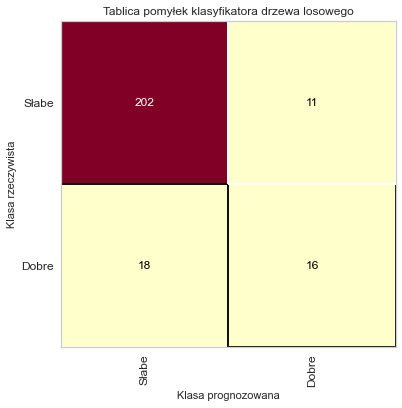

In [14]:
from yellowbrick.classifier import (ConfusionMatrix,)
mapping = {0: "Słabe", 1: "Dobre"} 
fig, ax = plt.subplots (figsize=(6, 6)) 
cm_viz = ConfusionMatrix( dt,classes=["Słabe", "Dobre"], label_encoder=mapping,) 
cm_viz.score (X_test, y_test) 
cm_viz.ax.set(title="Tablica pomyłek klasyfikatora drzewa losowego", xlabel="Klasa prognozowana", ylabel="Klasa rzeczywista")
# Ćwiartki lewa górna i prawa dolna zawierają poprawne wyniki klasyfikacji, a lewa dolna i prawa górna -błędne; ćwiartka lewa dolna zawiera wyniki fałszywie negatywne 
# a prawa górna - fałszywie pozytywne.  Centrum dobrego klasyfikatora są duże wartości prawdziwych wyników na przekątnej tabeli

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


[Text(0, 0.5, 'SŁABE'), Text(0, 1.5, 'DOBRE')]

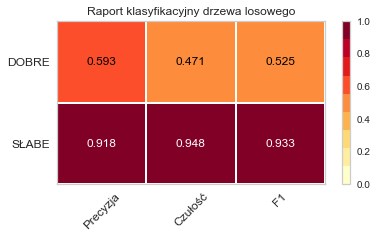

In [15]:
# Raport klasyfikacyjny prezentujący precyzję, czułośc, wskaźnik F1 dla wyników pozytywnych i negatywnych. 
# Im dany wskaźnik jest lepszy -bliższy jedności -tym komórka jest bardziej czerwona
from yellowbrick.classifier import (ClassificationReport,)
fig, ax = plt.subplots (figsize=(6, 3))
cm_viz = ClassificationReport( dt,classes=["SŁABE", "DOBRE"], label_encoder=mapping)

cm_viz.score (X_test, y_test) 
cm_viz.ax.set (title="Raport klasyfikacyjny drzewa losowego")
xlabels = ("Precyzja", "Czułość", "F1")
ax.set_xticks (np.arange(len(xlabels)) + 0.5) 
ax.set_xticklabels (xlabels, rotation=45)
ax.set_yticks (np.arange(len(cm_viz.classes)) + 0.5) 
ax.set_yticklabels (cm_viz.classes) 

In [16]:
# w lewo i w górę. Przekątna reprezentuje klasyfikator generujący losowe w niki. Pole pod krzywą jest wskaźnikiem opisującym skuteczność modelu. Pon Wy żej przedstawiony jest kod wyliczający ten wskaźnik:

from sklearn.metrics import roc_auc_score 
y_predict = dt.predict(X_test) 
roc_auc_score (y_test, y_predict)


0.7094725214029275

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


AttributeError: 'DecisionTreeClassifier' object has no attribute 'target_type_'

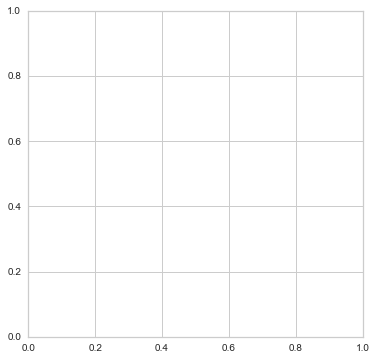

In [17]:
from yellowbrick.classifier import ROCAUC 
fig, ax = plt.subplots (figsize=(6, 6))

roc_viz = ROCAUC (dt)
roc_viz.score(X_test, y_test)
roc_viz.ax.set (title="Krzywa ROC klasyfikatora drzewa losowego", xlabel="Odsetek wyników fałszywie pozytywnych", ylabel="Odsetek wyników prawdziwie pozytywnych") 
ax.legend (("Krzywa ROC klasy {}, pole = {:0.2f}".format(roc_viz.classes_[0], roc_viz.roc_auc[0]),"Krzywa ROC klasy {}, pole = {:0.2f)".format(roc_viz.classes_[1],roc_viz.roc_auc[1]),
"Mikrośrednia krzywej ROC, pole = (:0.2f}".format(roc_viz. roc_auc ["micro"]), "Makrośrednia krzywej ROC, pole ={:0.2f}".format(roc_viz.roc_auc ["macro"])), frameon=True, loc= "lower right")

0.450170120864752


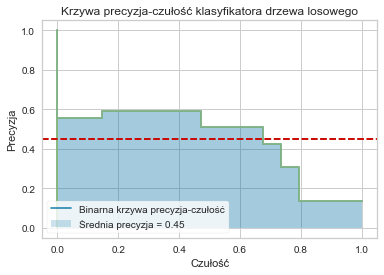

In [37]:
# Krzywa precyzja- czułość
# jeżeli klasy nie są zrównoważone wtedy na podstawie krzywej ROC  można wyciągnąć nadmiernie optymistyczne wnioski. 
# Dlatego stosowany jest inny sposób oceniania klasyfikatora polegające na wykreśleniu krzywej Precision- Recall curve. 
# Klasyfikacja to zrównoważony proces wyszukiwania potrzebnych danych (czułość) przy jednoczesnym ograniczeniu błędnych wyników (precyzja). 
# Zazwyczaj trzeba znaleźć kompromis między tymi pojęciami. Im większa czułość tym mniejsza precyzja i odwrotnie. Kod tworzący wykres precyzja czułość z krzywą

from yellowbrick.classifier import ( PrecisionRecallCurve,)
fig, ax = plt.subplots (figsize=(6, 4))
viz = PrecisionRecallCurve (DecisionTreeClassifier (max_depth=3))

viz. fit (X_train, y_train)
print(viz.score (X_test, y_test)) 
viz.ax.set(title="Krzywa precyzja-czułość klasyfikatora drzewa losowego",xlabel="Czułość", ylabel="Precyzja") 
ax.legend (("Binarna krzywa precyzja-czułość","Średnia precyzja = {:0.2f}".format (viz.score(X_test,y_test))),frameon=True, loc="lower left") 

NameError: name 'scikitplot' is not defined

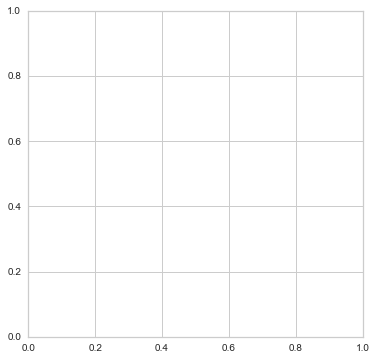

In [22]:
# Analiza skumulowanych zysków- Krzywa podniesienia- opisuje o ile Lepszy jest dany model od modelu odniesienia czy zależności pomiędzy odsetkiem wyników prawdziwie pozytywnych 
# a odsetkiem pozytywnych prognoz(krzywa skumulowanych zysków- celem jest po sortowanie wszystkich klasyfikacji według prognozowanego prawdopodobieństwa).
# Wyliczanie szansy wyboru dobrej jakości wina i wybranie pierwszych 20% podniesienie będzie równe 2,2- jest to zysk podzielony przez odsetek próby.  
# Tyle Więcej sztuk dobrego gatunku będzie wybranych przypadku losowego typowania
# !pip install scikit-plot
# !pip install -U scikit-learn
# !pip install -U scikit-learn scipy matplotlib
import scikitplot as skplt 
from scikitplot.estimators import plot_feature_importances
import matplotlib.pyplot as plt 
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_lift_curve
fig, ax = plt.subplots(figsize=(6, 6))

y_probas = dt.predict_proba (X_test) 
scikitplot.metrics.plot_lift_curve (y_test, y_probas, ax=ax)
ax.set(title="Krzywa podniesienia", xlabel="Odsetek próbek", ylabel="Podniesienie")
ax.legend (("Klasa 0", "Klasa 1", "Krzywa odniesienia"), frameon=True,loc= "upper right")

[Text(0.5, 1.0, 'Równowaga klas dla (:,) próbek'),
 Text(0, 0.5, 'Liczba próbek')]

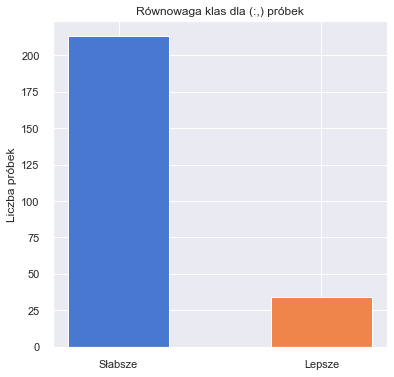

In [52]:
# Równowaga class

# Wykres ilustruje wielkość klas, jeżeli klasy różnią się wielkością wtedy dokładność nie jest odpowiednim wskaźnikiem jakości modelu.  
# Aby zachować właściwe proporcje między klasami danych należy przydzieleniu ich na zbiory treningowy i testowy stosować losowanie warstwowe (parametr stratify)
from yellowbrick.classifier import ClassBalance
fig, ax = plt.subplots (figsize=(6,6))

cb_viz=ClassBalance (labels =["Słabsze", "Lepsze"])
cb_viz.fit(y_test)

ax.set_xticks (np.arange(len(cb_viz.labels))) 
ax.set_xticklabels (cb_viz.labels) 
ax.set(title="Równowaga klas dla (:,) próbek".format(cb_viz.support_.sum()), ylabel="Liczba próbek")
# Na wykresie uzyskano nierównowagę klas

AttributeError: 'DecisionTreeClassifier' object has no attribute 'target_type_'

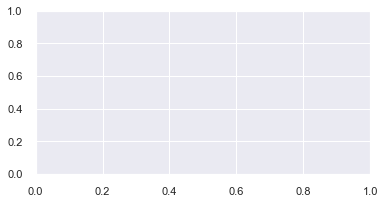

In [53]:
# Błąd prognozowania klas
# wykres błędu prognozowania klas ilustrujący tablicę pomyłek. 

from yellowbrick.classifier import (ClassPredictionError,)

fig, ax = plt.subplots (figsize=(6, 3)) 
cpe_viz = ClassPredictionError(dt, classes=["Słabsze", "Lepsze"])
cpe_viz.score (X_test, y_test)
ax.set_xticks (np.arange(len(cpe_viz.classes))) 
ax.set_xticklabels (cpe_viz.classes)
ax.set(title="Błąd prognozowania klas dla klasyfikatora drzewa losowego", xlabel="Klasa rzeczywista", ylabel="Klasa prognozowana")

c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 1.0, "Lokalna interpretacja klasy 'lepsze'")]

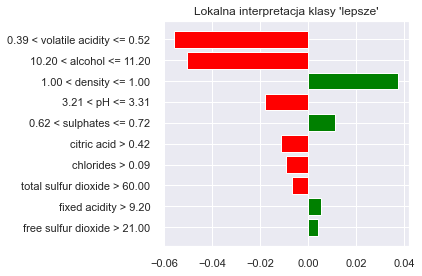

In [57]:
# Analiza LIME  pokazująca, jak poszczególne cechy próbki przesuwają wyniki prognozy w prawo (wybór lepszego gatunku) lub w lewo (słabego gatunku)
# Poniżej przedstawiony jest kod umożliwiający interpretację ostatniej próbki danych ze zbioru treningowego, dla której nasz model drzewa decyzyjnego prognozuje wybór lepszego gatunku:

from lime import lime_tabular 
explainer = lime_tabular. LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=["słabsze", "lepsze"])
exp = explainer.explain_instance( X_train.iloc[-1].values, dt.predict_proba)
# Danymi wejściowymi dla pakietu LIME nie może być struktura DataFrame. Zwróć uwagę, że jest ona zamieniana na tablicę numpy za pomocą atrybutu .values.
fig = exp.as_pyplot_figure() 
fig.tight_layout()
fig.gca().set (title="Lokalna interpretacja klasy '%s'" % exp.class_names [1])

### Analizy na bazie drugiego modelu random forest

In [15]:
# Wykres częściowych zaleznosci

# Na podstawie ważności cechy można określić jej wpływ na wynik, ale nie można ocenić, 
# jak jej zmienność wpływa na zmienność wyniku. Wykres częściowych zależności ilustruje relację pomiędzy zmianami jednej cechy a zmianami wyników. 
# Aby zobrazować wpływ wieku na szanse przezycia
# W tym przykładzie wykorzystamy model lasu losowego: 
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
rf5 = ensemble.RandomForestClassifier(min_samples_leaf= 0.1, n_estimators= 200, random_state= 42,)  #n_estimators = 5, criterion = 'gini', max_depth=4,
rf5.fit(X_train, y_train) 

# from pdpbox import pdp rf5, X, X.columns, feat_name = pdp.pdp_plot( >>> fig,
# feat name = "age" 
# p = pdp.pdp_isolate(
# )

# p, feat_name, plot_lines=True,
# plot_params={
# 'title': 'Wykres częściowych zależności dla cechy "%s" % feat_name, 'subtitle': None
# # Wykres częściowych zależności pokazujący wpływ zmian wieku a prognozowane wyniki

# features ["fare", "sex_male"]=
# p = pdp.pdp_interact(rf5, X, X.columns, features
# fig, ... = pdp.pdp_interact_plot (p, features, plot params = { 'title': 'Wykres interakcji między cechami "%s" i "%s" (features[0], features [1]), 'subtitle': None}) )

# Na wykresie częściowych zależności ustalana jest wartość wybranej cechy spośród wszystkich próbek i wyliczana średnia wyników. (Przy uśrednia niu należy uważać na wartości odstające). 
# Ponadto przyjęte jest założenie, że cechy są niezależne od siebie, co nie zawsze jest prawdą. Aby jeszcze lepiej zilustrować zależności, biblioteka pdpbox wyświetla poszczególne wartości warunkowe.

RandomForestClassifier(min_samples_leaf=0.1, n_estimators=200, random_state=42)

In [89]:
!pip install numba==0.53
! pip install shap
!pip3 install librosa
!pip install numba --upgrade
print('The scikit-learn version is {}.'.format(sklearn.__version__))
!pip3 install numpy==1.21.4

ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39.0, 0.40.0, 0.40.1, 0.41.0, 0.42.0, 0.42.1, 0.43.0, 0.43.1, 0.44.0, 0.44.1, 0.45.0, 0.45.1, 0.46.0, 0.47.0, 0.48.0, 0.49.0, 0.49.1rc1, 0.49.1, 0.50.0rc1, 0.50.0, 0.50.1, 0.51.0rc1, 0.51.0, 0.51.1, 0.51.2, 0.52.0rc2, 0.55.0rc1, 0.55.0, 0.55.1, 0.55.2, 0.56.0rc1, 0.56.0)
ERROR: No matching distribution found for numba==0.53


In [28]:
import numpy
numpy.__version__

'1.21.4'

In [16]:
import shap
s = shap.TreeExplainer(rf5)
shap_vals = s.shap_values (X_test)
target_idx=1
shap. force_plot(s.expected_value[target_idx],shap_vals [target_idx] [20, :])


In [17]:
shap.initjs(),
shap.force_plot(base_value=explainer_shap.expected_value,
shap_values=shap_values[10,:],
features=X_train.iloc[10,:])

NameError: name 'explainer_shap' is not defined

In [18]:
# Rozkład cech próbki nr 20 zilustrowany za pomocą pakietu Shapley; wykres pokazuje wartość bazową oraz cechy, które powodują, że prognozowana jest śmierć pasażera

shap.force_plot(s.expected_value[1],shap_vals [1],feature_names=X_test.columns)

# Za pomocą biblioteki shap można również tworzyć wykresy zależności międz cechami. Wykres przedstawia zależność pomiędz wiekiem (age) a wartością SHAP. 
# Punkty są pokolorowane według wartośc automatycznie wybranej cechy pclass, jednak w parametrze interaction_inde można wskazać inną cechę. Poniżej przedstawiony jest kod tworzący wykres

from shap.plots import labels
labels ['VALUE_FOR']="Wartość SHAP dla cechy\n%s" 
fig, ax =  plt.subplots (figsize=(6, 4))
res = shap.dependence_plot( "age",shap_vals [target_idx],X_test,feature_names-X_test.columns)

# Interpretacja modelu
# Shapley

labels ['VALUE']="Wartość SHAP (wpływ na wynik modelu)" 
labels ['FEATURE_VALUE']="Wartość cechy"
labels ['FEATURE_VALUE_HIGH']="Wysoka"
labels ['FEATURE_VALUE_LOW']="Niska"
fig, ax = plt.subplots (figsize=(6, 4)) 
shap.summary_plot (shap_vals[0], X_test)

ImportError: cannot import name 'labels' from 'shap.plots' (c:\Users\tk\anaconda3\envs\my_env\lib\site-packages\shap\plots\__init__.py)

### Analizy na bazie modelu XGBoost

In [22]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42, base_score=0.5)
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [23]:
# Shapley- Daje ona ogólny wgląd w model i ułatwia interpretację poszczególnych prognoz.
# Najpierw sprawdźmy prognozowany wynik dla próbki o indeksie __. Według naszego modelu jest to liczba w zaokrągleniu równa __:

sample_idx =411
xgr.predict (X_train.iloc[[sample_idx]]) 

array([0.9994402], dtype=float32)

In [24]:
import shap 
shap.initjs()
exp = shap. TreeExplainer (xgr)
vals = exp.shap_values (X_train)
shap.force_plot(exp.expected_value,vals [sample_idx], X_train.iloc[sample_idx],)

#Utworzono obiekt TreeExplainer i wyliczono wartość shap dla próbek. Po utworzeniu obiektu w wyliczeniu wartości utworzona wykres siłowy ułatwiające interpretację prognozowanych wartości
# Wykres siłowy opisujący model regresyjny; status populacji i stawka podatku obniżają wartość bazową z 0,137 do 27
# Base Value to prognozowana wartość bazowa,  czerwone cechy to te które podnoszą jakość wszystkie to te które obniżają jakość.  Cechy te obniżyły wartość bazową zera

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:

# Można również utworzyć wykres siłowy dla wszystkich próbek i uzyskać w ten sposób obraz działania całego modelu. 
# Jeżeli w środowisku Jupyter jest włączo na obsługa skryptów JavaScript, po umieszczeniu nad próbką wskaźnika my szy pojawia się informacja o cechach, 
# które wpływają na prognozowany wynik. Poniższy kod tworzy interaktywny wykres:

shap.force_plot( exp.expected_value, vals, X_train)

In [ ]:
la podstawie wykresu zależności (patrz rysunek 16.3) można stwierdzić, że miarę wzrostu wartości cechy LSTAT wartości SHAP zmniejszają się (obniżane prognozowane wyniki). Bardzo mała wartość LSTAT podnosi wartość HAP. Kolory cechy TAX potwierdzają, że im niższa jest stawka podatku (kolor ebieski), tym wartości SHAP są większe. Poniższy kod tworzy wykres za
from shap.plots import labels 
labels ['VALUE_FOR']="Wartość SHAP dla cechy \n %s" 
fig, ax = plt.subplots (figsize=(6, 4)) 
shap.dependence_plot("LSTAT", vals, bos_X)
fig, ax = plt.subplots (figsize=(6, 4))

shap.dependence_plot("DIS", vals, bos_X, interaction_index="RM")